In [2]:
import pandas as pd

# Load your raw dataset
df = pd.read_csv("demand_forecasting_dataset.csv")

# Peek at data
print(df.head())
print(df.info())


         date  product_id  sales_units  holiday_season  promotion_applied  \
0  2023-01-01         151           99               0                  0   
1  2023-01-02         192           95               1                  0   
2  2023-01-03         114          101               0                  0   
3  2023-01-04         171           33               0                  0   
4  2023-01-05         160           82               0                  1   

   competitor_price_index  economic_index  weather_impact       price  \
0                0.983893        1.314333               0  126.932922   
1                0.977615        1.439582               0  151.355405   
2                0.983913        1.094795               0  191.701693   
3                1.191956        0.907672               0  173.106487   
4                0.855711        1.479690               0  138.587491   

   discount_percentage  sales_revenue  region_Europe  region_North America  \
0             0.0000

In [13]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract date features
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Mon
df['month'] = df['date'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df.head()  # Shows first 5 rows

,date,product_id,sales_units,holiday_season,promotion_applied,competitor_price_index,economic_index,weather_impact,price,discount_percentage,...,category_Sofas,category_Tables,future_demand,day_of_week,month,is_weekend,adjusted_revenue,region,store_type,category
0,2023-01-01,151,99,0,0,0.983893,1.314333,0,126.932922,0.000000,...,False,False,95.0,6,1,1,12566.359326,0,0,1
1,2023-01-02,192,95,1,0,0.977615,1.439582,0,151.355405,0.000000,...,False,False,101.0,0,1,0,14378.763512,1,0,0
2,2023-01-03,114,101,0,0,0.983913,1.094795,0,191.701693,0.000000,...,False,False,33.0,1,1,0,19361.870952,0,1,0
3,2023-01-04,171,33,0,0,1.191956,0.907672,0,173.106487,0.000000,...,False,False,82.0,2,1,0,5712.514059,0,1,1
4,2023-01-05,160,82,0,1,0.855711,1.479690,0,138.587491,10.995213,...,True,False,13.0,3,1,0,10114.659145,0,0,2


In [14]:
df['adjusted_revenue'] = df['sales_units'] * df['price'] * (1 - df['discount_percentage'] / 100)
df.head()  # Shows first 5 rows


,date,product_id,sales_units,holiday_season,promotion_applied,competitor_price_index,economic_index,weather_impact,price,discount_percentage,...,category_Sofas,category_Tables,future_demand,day_of_week,month,is_weekend,adjusted_revenue,region,store_type,category
0,2023-01-01,151,99,0,0,0.983893,1.314333,0,126.932922,0.000000,...,False,False,95.0,6,1,1,12566.359326,0,0,1
1,2023-01-02,192,95,1,0,0.977615,1.439582,0,151.355405,0.000000,...,False,False,101.0,0,1,0,14378.763512,1,0,0
2,2023-01-03,114,101,0,0,0.983913,1.094795,0,191.701693,0.000000,...,False,False,33.0,1,1,0,19361.870952,0,1,0
3,2023-01-04,171,33,0,0,1.191956,0.907672,0,173.106487,0.000000,...,False,False,82.0,2,1,0,5712.514059,0,1,1
4,2023-01-05,160,82,0,1,0.855711,1.479690,0,138.587491,10.995213,...,True,False,13.0,3,1,0,10114.659145,0,0,2


In [6]:
# Reconstruct original categorical columns if they were one-hot encoded
df['region'] = df[['region_Europe', 'region_North America']].idxmax(axis=1).str.replace('region_', '')
df['store_type'] = df[['store_type_Retail', 'store_type_Wholesale']].idxmax(axis=1).str.replace('store_type_', '')
df['category'] = df[['category_Cabinets', 'category_Chairs', 'category_Sofas', 'category_Tables']].idxmax(axis=1).str.replace('category_', '')


In [18]:
# Drop rows with nulls in important columns
df = df.dropna(subset=[
    'region', 'store_type', 'category', 'sales_units', 'price',
    'discount_percentage', 'date', 'future_demand'
])

# Filter out negative or zero values
df = df[
    (df['sales_units'] > 0) &
    (df['price'] > 0) &
    (df['discount_percentage'] >= 0) &
    (df['future_demand'] >= 0)
]
df.head()  # Shows first 5 rows


,date,product_id,sales_units,holiday_season,promotion_applied,competitor_price_index,economic_index,weather_impact,price,discount_percentage,...,category_Sofas,category_Tables,future_demand,day_of_week,month,is_weekend,adjusted_revenue,region,store_type,category
0,2023-01-01,151,99,0,0,0.983893,1.314333,0,126.932922,0.000000,...,False,False,95.0,6,1,1,12566.359326,0,0,1
1,2023-01-02,192,95,1,0,0.977615,1.439582,0,151.355405,0.000000,...,False,False,101.0,0,1,0,14378.763512,1,0,0
2,2023-01-03,114,101,0,0,0.983913,1.094795,0,191.701693,0.000000,...,False,False,33.0,1,1,0,19361.870952,0,1,0
3,2023-01-04,171,33,0,0,1.191956,0.907672,0,173.106487,0.000000,...,False,False,82.0,2,1,0,5712.514059,0,1,1
4,2023-01-05,160,82,0,1,0.855711,1.479690,0,138.587491,10.995213,...,True,False,13.0,3,1,0,10114.659145,0,0,2


In [19]:
from sklearn.preprocessing import LabelEncoder

le_region = LabelEncoder()
le_store = LabelEncoder()
le_category = LabelEncoder()

df['region'] = le_region.fit_transform(df['region'])
df['store_type'] = le_store.fit_transform(df['store_type'])
df['category'] = le_category.fit_transform(df['category'])
df.head()  # Shows first 5 rows

,date,product_id,sales_units,holiday_season,promotion_applied,competitor_price_index,economic_index,weather_impact,price,discount_percentage,...,category_Sofas,category_Tables,future_demand,day_of_week,month,is_weekend,adjusted_revenue,region,store_type,category
0,2023-01-01,151,99,0,0,0.983893,1.314333,0,126.932922,0.000000,...,False,False,95.0,6,1,1,12566.359326,0,0,1
1,2023-01-02,192,95,1,0,0.977615,1.439582,0,151.355405,0.000000,...,False,False,101.0,0,1,0,14378.763512,1,0,0
2,2023-01-03,114,101,0,0,0.983913,1.094795,0,191.701693,0.000000,...,False,False,33.0,1,1,0,19361.870952,0,1,0
3,2023-01-04,171,33,0,0,1.191956,0.907672,0,173.106487,0.000000,...,False,False,82.0,2,1,0,5712.514059,0,1,1
4,2023-01-05,160,82,0,1,0.855711,1.479690,0,138.587491,10.995213,...,True,False,13.0,3,1,0,10114.659145,0,0,2


In [9]:
df.to_csv("cleaned_fmcg_dataset.csv", index=False)


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 3070.8091747632575
R² Score: -0.003889957600290206


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


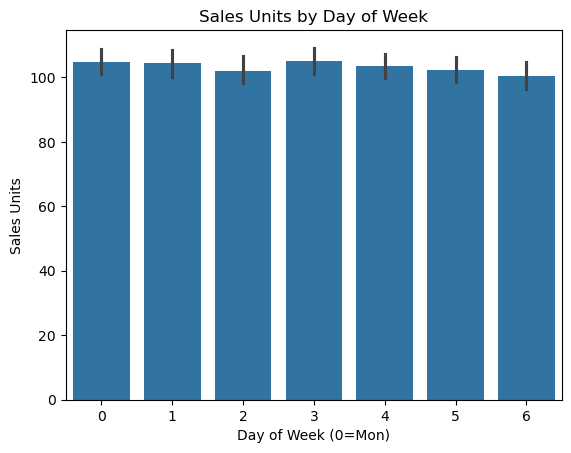

In [21]:
sns.barplot(x='day_of_week', y='sales_units', data=df)
plt.title('Sales Units by Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Sales Units')
plt.show()

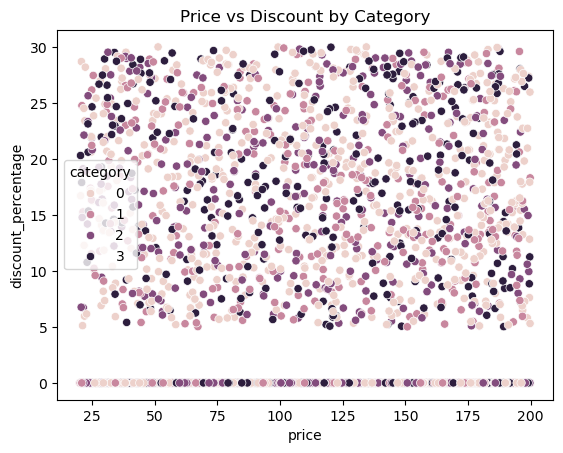

In [22]:
sns.scatterplot(x='price', y='discount_percentage', hue='category', data=df)
plt.title('Price vs Discount by Category')
plt.show()

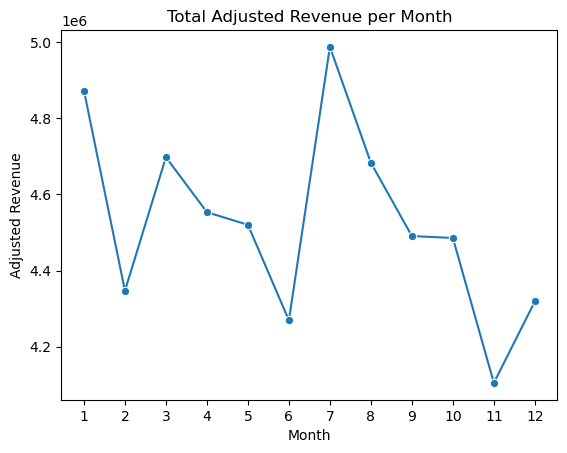

In [23]:
monthly_revenue = df.groupby('month')['adjusted_revenue'].sum().reset_index()

sns.lineplot(x='month', y='adjusted_revenue', data=monthly_revenue, marker='o')
plt.title('Total Adjusted Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Adjusted Revenue')
plt.xticks(range(1, 13))
plt.show()


In [24]:
df.to_csv("cleaned_fmcg_dataset.csv", index=False)